In [2]:
import pandas as pd
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import json
import re
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer, accuracy_score

- split the data into training and testing
- treat any null/missing values
- use one-hot encoding to convert categorical columns into k-category columns. Apply the one-hot encoder to the categorical columns of training and then to the testing
- find the cost-complexity parameter to prune the decision tree in order to prevent overfitting
- Analyse the decision tree.
- https://towardsdatascience.com/the-easiest-way-to-interpret-clustering-result-8137e488a127

# Unscaled Dataset

In [4]:
# change the path as necessary
df = pd.read_csv(r'../data/dataProcessing_files/red_data_clustering.csv.csv')
df.rename(columns={'Unnamed: 0': 'DR Number'}, inplace=True)
df

,DR Number,hour,Day Category,lat,long,label
0,100100007,22,night,34.0395,-118.2656,2
1,100100767,4,early_morning,34.0695,-118.2324,2
2,100100831,1,early_morning,34.0424,-118.2718,2
3,100101004,20,night,34.0344,-118.2714,2
4,100101322,16,evening,34.0637,-118.2361,2
...,...,...,...,...,...,...
570367,222104843,19,night,34.1857,-118.5710,2
570368,222104874,15,afternoon,34.1938,-118.6059,0
570369,222104886,17,evening,34.1740,-118.5888,1
570370,222104962,19,night,34.1624,-118.6285,2


- Split the data into training and testing (80:20)
- Split the training into multiple dataframes to test each cluster as binary classification
- Visualize and interpret clusters
- Train final decision tree model on the entire training set and use the test set to ensure model doesn't overfit and whether decisions made are valid.

In [4]:
#train, test = train_test_split(df_unscaled, test_size=0.10, random_state=42)
# train = train.fillna("Unknown")
# test = test.fillna("Unknown")
# categorical_cols = ['Premise Description', 'Day Category', 'Area Name', 'month', 'day', 'hour']

# print('Unique Items in each categorical column')

    

# def preprocess(train, test):
#     categorical_cols = ['Premise Description', 'Day Category', 'Area Name', 'month', 'day', 'hour']
#     enc = OneHotEncoder(handle_unknown='ignore')
#     X_train = pd.DataFrame(enc.fit_transform(train[categorical_cols]).toarray())
#     X_test = pd.DataFrame(enc.transform(test[categorical_cols]).toarray())

#     X_train.columns = list(enc.get_feature_names_out(categorical_cols))
#     X_test.columns = list(enc.get_feature_names_out(categorical_cols)) 

#     X_train['latitude'] = train['lat']
#     X_train['longitude'] = train['long']
#     X_test['latitude'] = test['lat']
#     X_test['longitude'] = test['long']

#     y_train = train['label']
#     y_test = test['label']

#     return X_train, X_test, y_train, y_test

In [5]:
df.label.value_counts()

2    197098
1    193028
0    180246
Name: label, dtype: int64

In [6]:
y_0 = df['label'].apply(lambda x: 1 if x==0 else 0)
y_1 = df['label'].apply(lambda x: 1 if x==1 else 0)
y_2 = df['label'].apply(lambda x: 1 if x==2 else 0)

print(y_0.value_counts())
print('\n')
print(y_1.value_counts())
print('\n')
print(y_2.value_counts())

0    390126
1    180246
Name: label, dtype: int64


0    377344
1    193028
Name: label, dtype: int64


0    373274
1    197098
Name: label, dtype: int64


In [10]:
categorical_cols = ['hour', 'Day Category']

enc = OneHotEncoder(handle_unknown='ignore')
df_1 = pd.DataFrame(enc.fit_transform(df[categorical_cols]).toarray())
df_1.columns = list(enc.get_feature_names_out(categorical_cols))
X = pd.concat((df_1, df[['lat', 'long']]), axis=1)

X

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,hour_21,hour_22,hour_23,Day Category_afternoon,Day Category_early_morning,Day Category_evening,Day Category_morning,Day Category_night,lat,long
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0395,-118.2656
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0695,-118.2324
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0424,-118.2718
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0344,-118.2714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0637,-118.2361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.1857,-118.5710
570368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.1938,-118.6059
570369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.1740,-118.5888
570370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.1624,-118.6285


<hr>

In [10]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict
def cluster_report(num, data: pd.DataFrame, clusters, min_samples_leaf=1, pruning_level=0.05):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
          # rule 1: proportion of instance that belong to cluster x
          # rule 0: The rules...
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
    
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    report_sorted = report_df.sort_values(by='class_name')[['class_name', 'rule_list']]
    class_rules = report_sorted.iloc[1,1].split('\n\n')

    # with open(f'../data/k_prototypes_unscaled_rules/rule_cluster{num}', 'w') as f:
      
    #   f.write(f'Class rules for cluster {num}')
    #   f.write('\n')
    #   f.write('\n')
    #   for rule in class_rules:
    #     f.write(rule)
    #     f.write('\n')

<h2>Cluster 0</h2>

In [68]:
# Cost Complexity Pruning for finding optimal parameters

In [11]:
parameters_0 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions= {
        "ccp_alpha":np.arange(0, 0.21, 0.01),
        "min_samples_leaf": np.arange(1,10)
    },
    cv=5
)


parameters_0.fit(X, y_0)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [12]:
print(parameters_0.best_params_)

{'min_samples_leaf': 3, 'ccp_alpha': 0.13}


[Text(0.7083333333333334, 0.9375, 'Day Category_afternoon <= 0.5\ngini = 0.432\nsamples = 570372\nvalue = [390126, 180246]\nclass = 0'),
 Text(0.625, 0.8125, 'lat <= 34.128\ngini = 0.191\nsamples = 436957\nvalue = [390126, 46831]\nclass = 0'),
 Text(0.4166666666666667, 0.6875, 'long <= -118.44\ngini = 0.027\nsamples = 296037\nvalue = [291943, 4094]\nclass = 0'),
 Text(0.3333333333333333, 0.5625, 'Day Category_early_morning <= 0.5\ngini = 0.274\nsamples = 19344\nvalue = [16178, 3166]\nclass = 0'),
 Text(0.16666666666666666, 0.4375, 'Day Category_evening <= 0.5\ngini = 0.207\nsamples = 17262\nvalue = [15236, 2026]\nclass = 0'),
 Text(0.08333333333333333, 0.3125, 'gini = 0.0\nsamples = 11580\nvalue = [11580, 0]\nclass = 0'),
 Text(0.25, 0.3125, 'lat <= 34.038\ngini = 0.459\nsamples = 5682\nvalue = [3656, 2026]\nclass = 0'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.11\nsamples = 2757\nvalue = [2596, 161]\nclass = 0'),
 Text(0.3333333333333333, 0.1875, 'hour_17 <= 0.5\ngini = 0.462\nsam

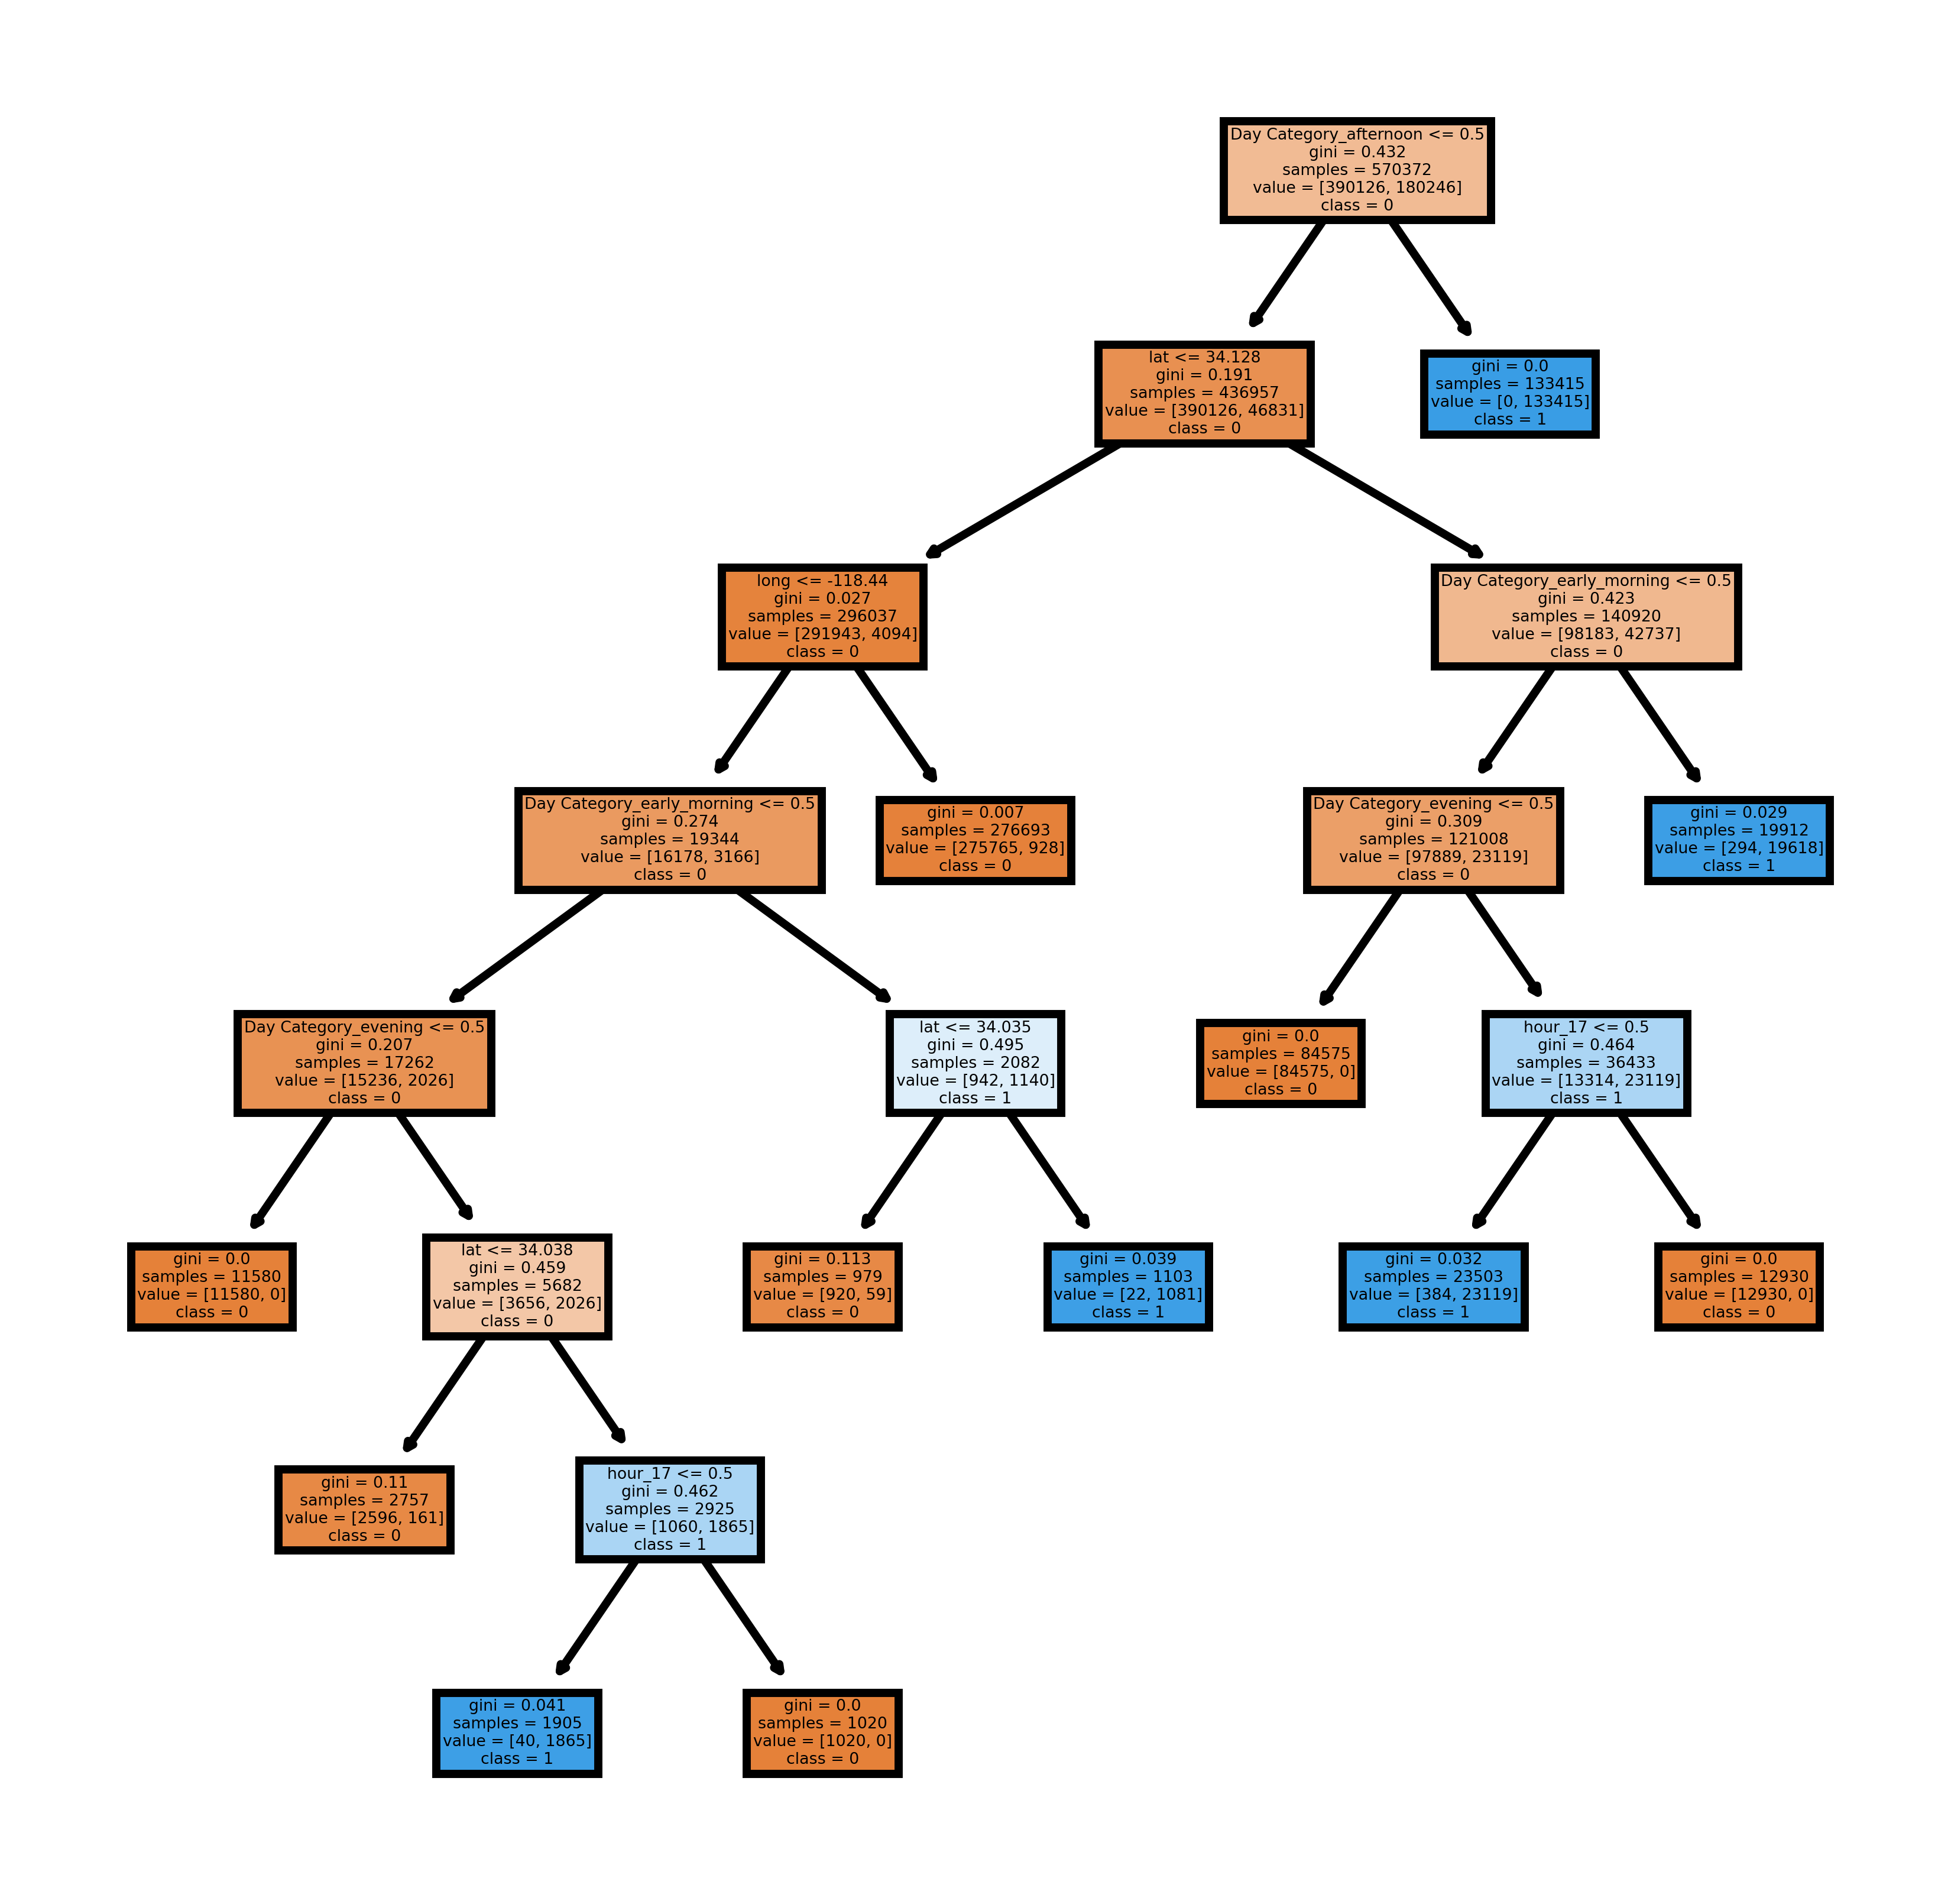

In [27]:
model_0 = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
model_0.fit(X, y_0)

plt.figure(figsize=(4,4), dpi=1000)
plot_tree(
    model_0, 
    feature_names=list(X.columns),
    class_names=[str(class_) for class_ in list(model_0.classes_)],
    filled=True
)

- 'feature_x > 0.5': This means feature = x
- 'feature_x <= 0.5': This means feature != x

In [85]:
# Cluster 0 evaluation
cluster_report(0, X, y_0, min_samples_leaf=6, pruning_level=0.01)

<h3>Cluster 1</h3>

In [19]:
parameters_1 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions= {
        "ccp_alpha":np.arange(0, 0.21, 0.01),
        "min_samples_leaf": np.arange(1,10)
    },
    cv=5
)


parameters_1.fit(X, y_1)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [20]:
print(parameters_1.best_params_)

{'min_samples_leaf': 9, 'ccp_alpha': 0.0}


In [88]:
# Cluster 1 evaluation
cluster_report(1, X, y_1, min_samples_leaf=9, pruning_level=0.01)

[Text(0.7692307692307693, 0.9545454545454546, 'Day Category_morning <= 0.5\ngini = 0.448\nsamples = 570372\nvalue = [377344, 193028]\nclass = 0'),
 Text(0.6923076923076923, 0.8636363636363636, 'hour_17 <= 0.5\ngini = 0.221\nsamples = 431956\nvalue = [377344, 54612]\nclass = 0'),
 Text(0.6153846153846154, 0.7727272727272727, 'Day Category_evening <= 0.5\ngini = 0.076\nsamples = 392864\nvalue = [377344, 15520]\nclass = 0'),
 Text(0.38461538461538464, 0.6818181818181818, 'Day Category_early_morning <= 0.5\ngini = 0.043\nsamples = 320178\nvalue = [313218, 6960]\nclass = 0'),
 Text(0.3076923076923077, 0.5909090909090909, 'gini = 0.0\nsamples = 255942\nvalue = [255942, 0]\nclass = 0'),
 Text(0.46153846153846156, 0.5909090909090909, 'long <= -118.32\ngini = 0.193\nsamples = 64236\nvalue = [57276, 6960]\nclass = 0'),
 Text(0.38461538461538464, 0.5, 'lat <= 34.127\ngini = 0.331\nsamples = 33073\nvalue = [26151, 6922]\nclass = 0'),
 Text(0.3076923076923077, 0.4090909090909091, 'lat <= 34.069\ngi

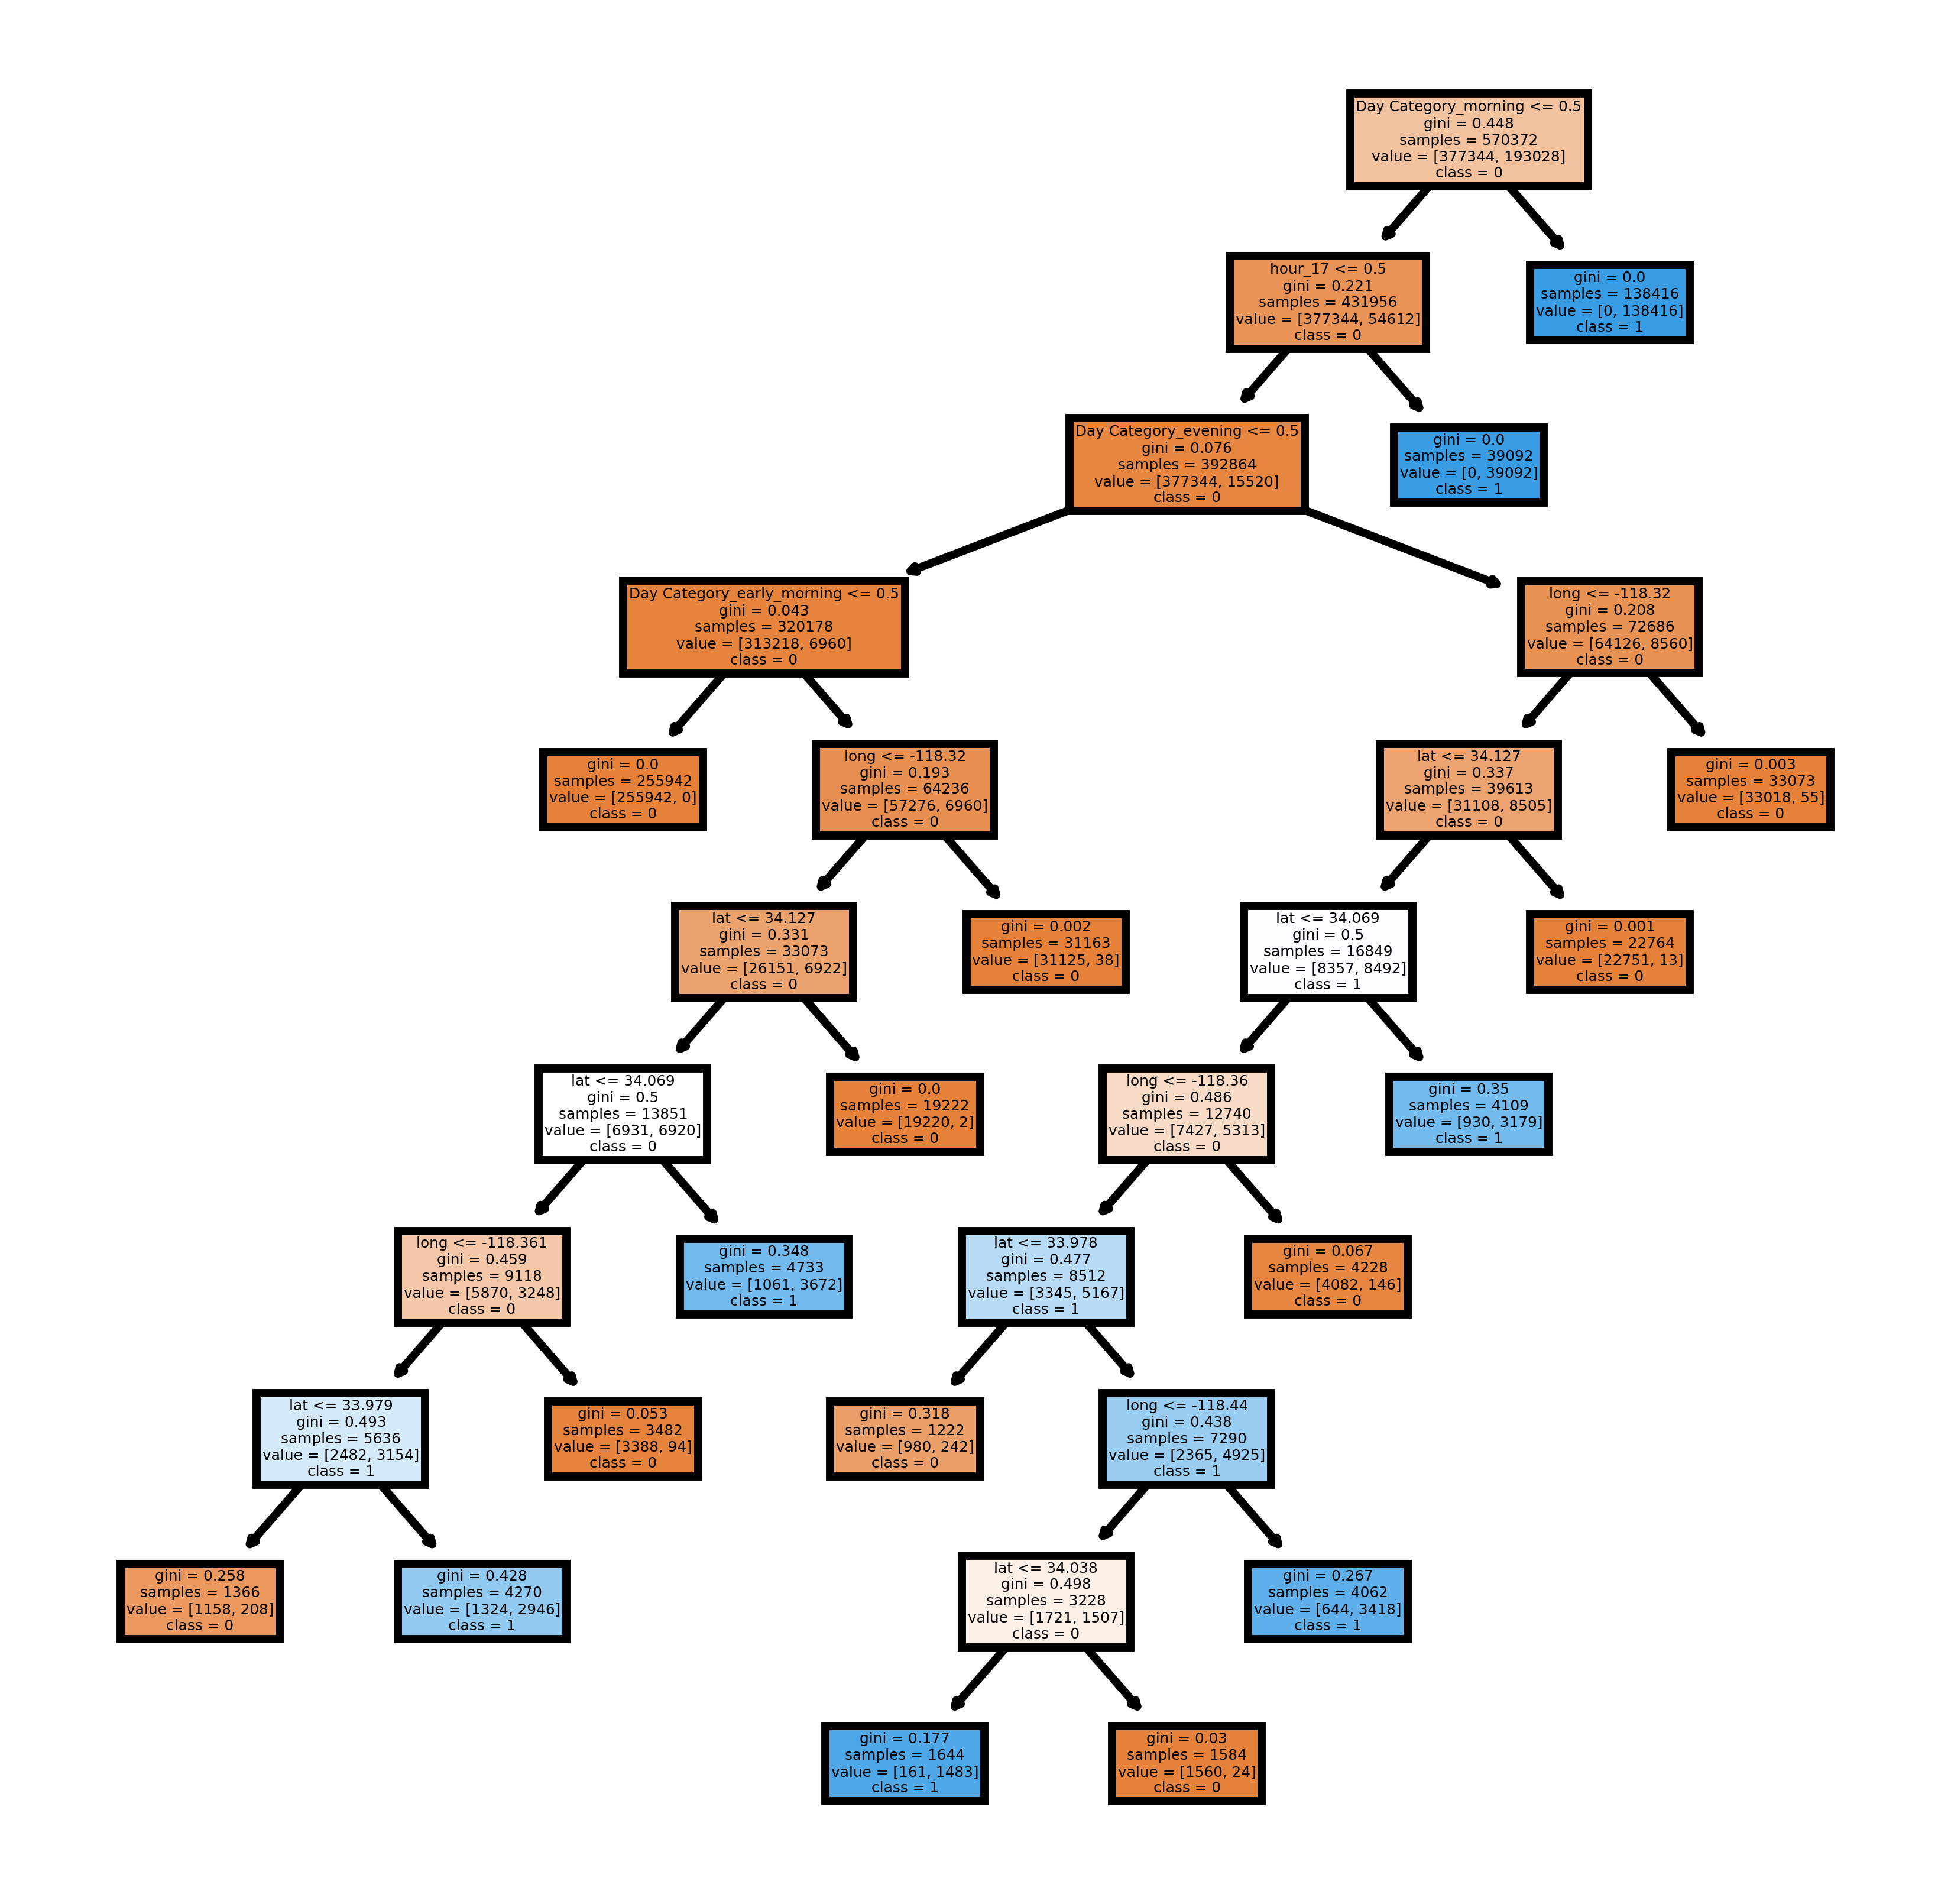

In [28]:
model_1 = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
model_1.fit(X, y_1)

plt.figure(figsize=(4,4), dpi=1000)
plot_tree(
    model_1, 
    feature_names=list(X.columns),
    class_names=[str(class_) for class_ in list(model_1.classes_)],
    filled=True
)

<h3>Cluster 2</h3>

In [86]:
parameters_2 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions= {
        "ccp_alpha":np.arange(0, 0.21, 0.01),
        "min_samples_leaf": np.arange(1,10)
    },
    cv=5
)


parameters_2.fit(X, y_2)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [87]:
print(parameters_2.best_params_)

{'min_samples_leaf': 8, 'ccp_alpha': 0.0}


In [14]:
# Cluster 2 evaluation
cluster_report(2, X, y_2, min_samples_leaf=8, pruning_level=0.01)

[Text(0.5277777777777778, 0.9375, 'Day Category_night <= 0.5\ngini = 0.452\nsamples = 570372\nvalue = [373274, 197098]\nclass = 0'),
 Text(0.4722222222222222, 0.8125, 'Day Category_early_morning <= 0.5\ngini = 0.278\nsamples = 447845\nvalue = [373274, 74571]\nclass = 0'),
 Text(0.16666666666666666, 0.6875, 'Day Category_evening <= 0.5\ngini = 0.181\nsamples = 383609\nvalue = [345082, 38527]\nclass = 0'),
 Text(0.1111111111111111, 0.5625, 'gini = 0.0\nsamples = 271831\nvalue = [271831, 0]\nclass = 0'),
 Text(0.2222222222222222, 0.5625, 'long <= -118.356\ngini = 0.452\nsamples = 111778\nvalue = [73251, 38527]\nclass = 0'),
 Text(0.1111111111111111, 0.4375, 'lat <= 33.98\ngini = 0.059\nsamples = 50487\nvalue = [48943, 1544]\nclass = 0'),
 Text(0.05555555555555555, 0.3125, 'gini = 0.499\nsamples = 1935\nvalue = [928, 1007]\nclass = 1'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.022\nsamples = 48552\nvalue = [48015, 537]\nclass = 0'),
 Text(0.3333333333333333, 0.4375, 'hour_17 <= 0.5\ngi

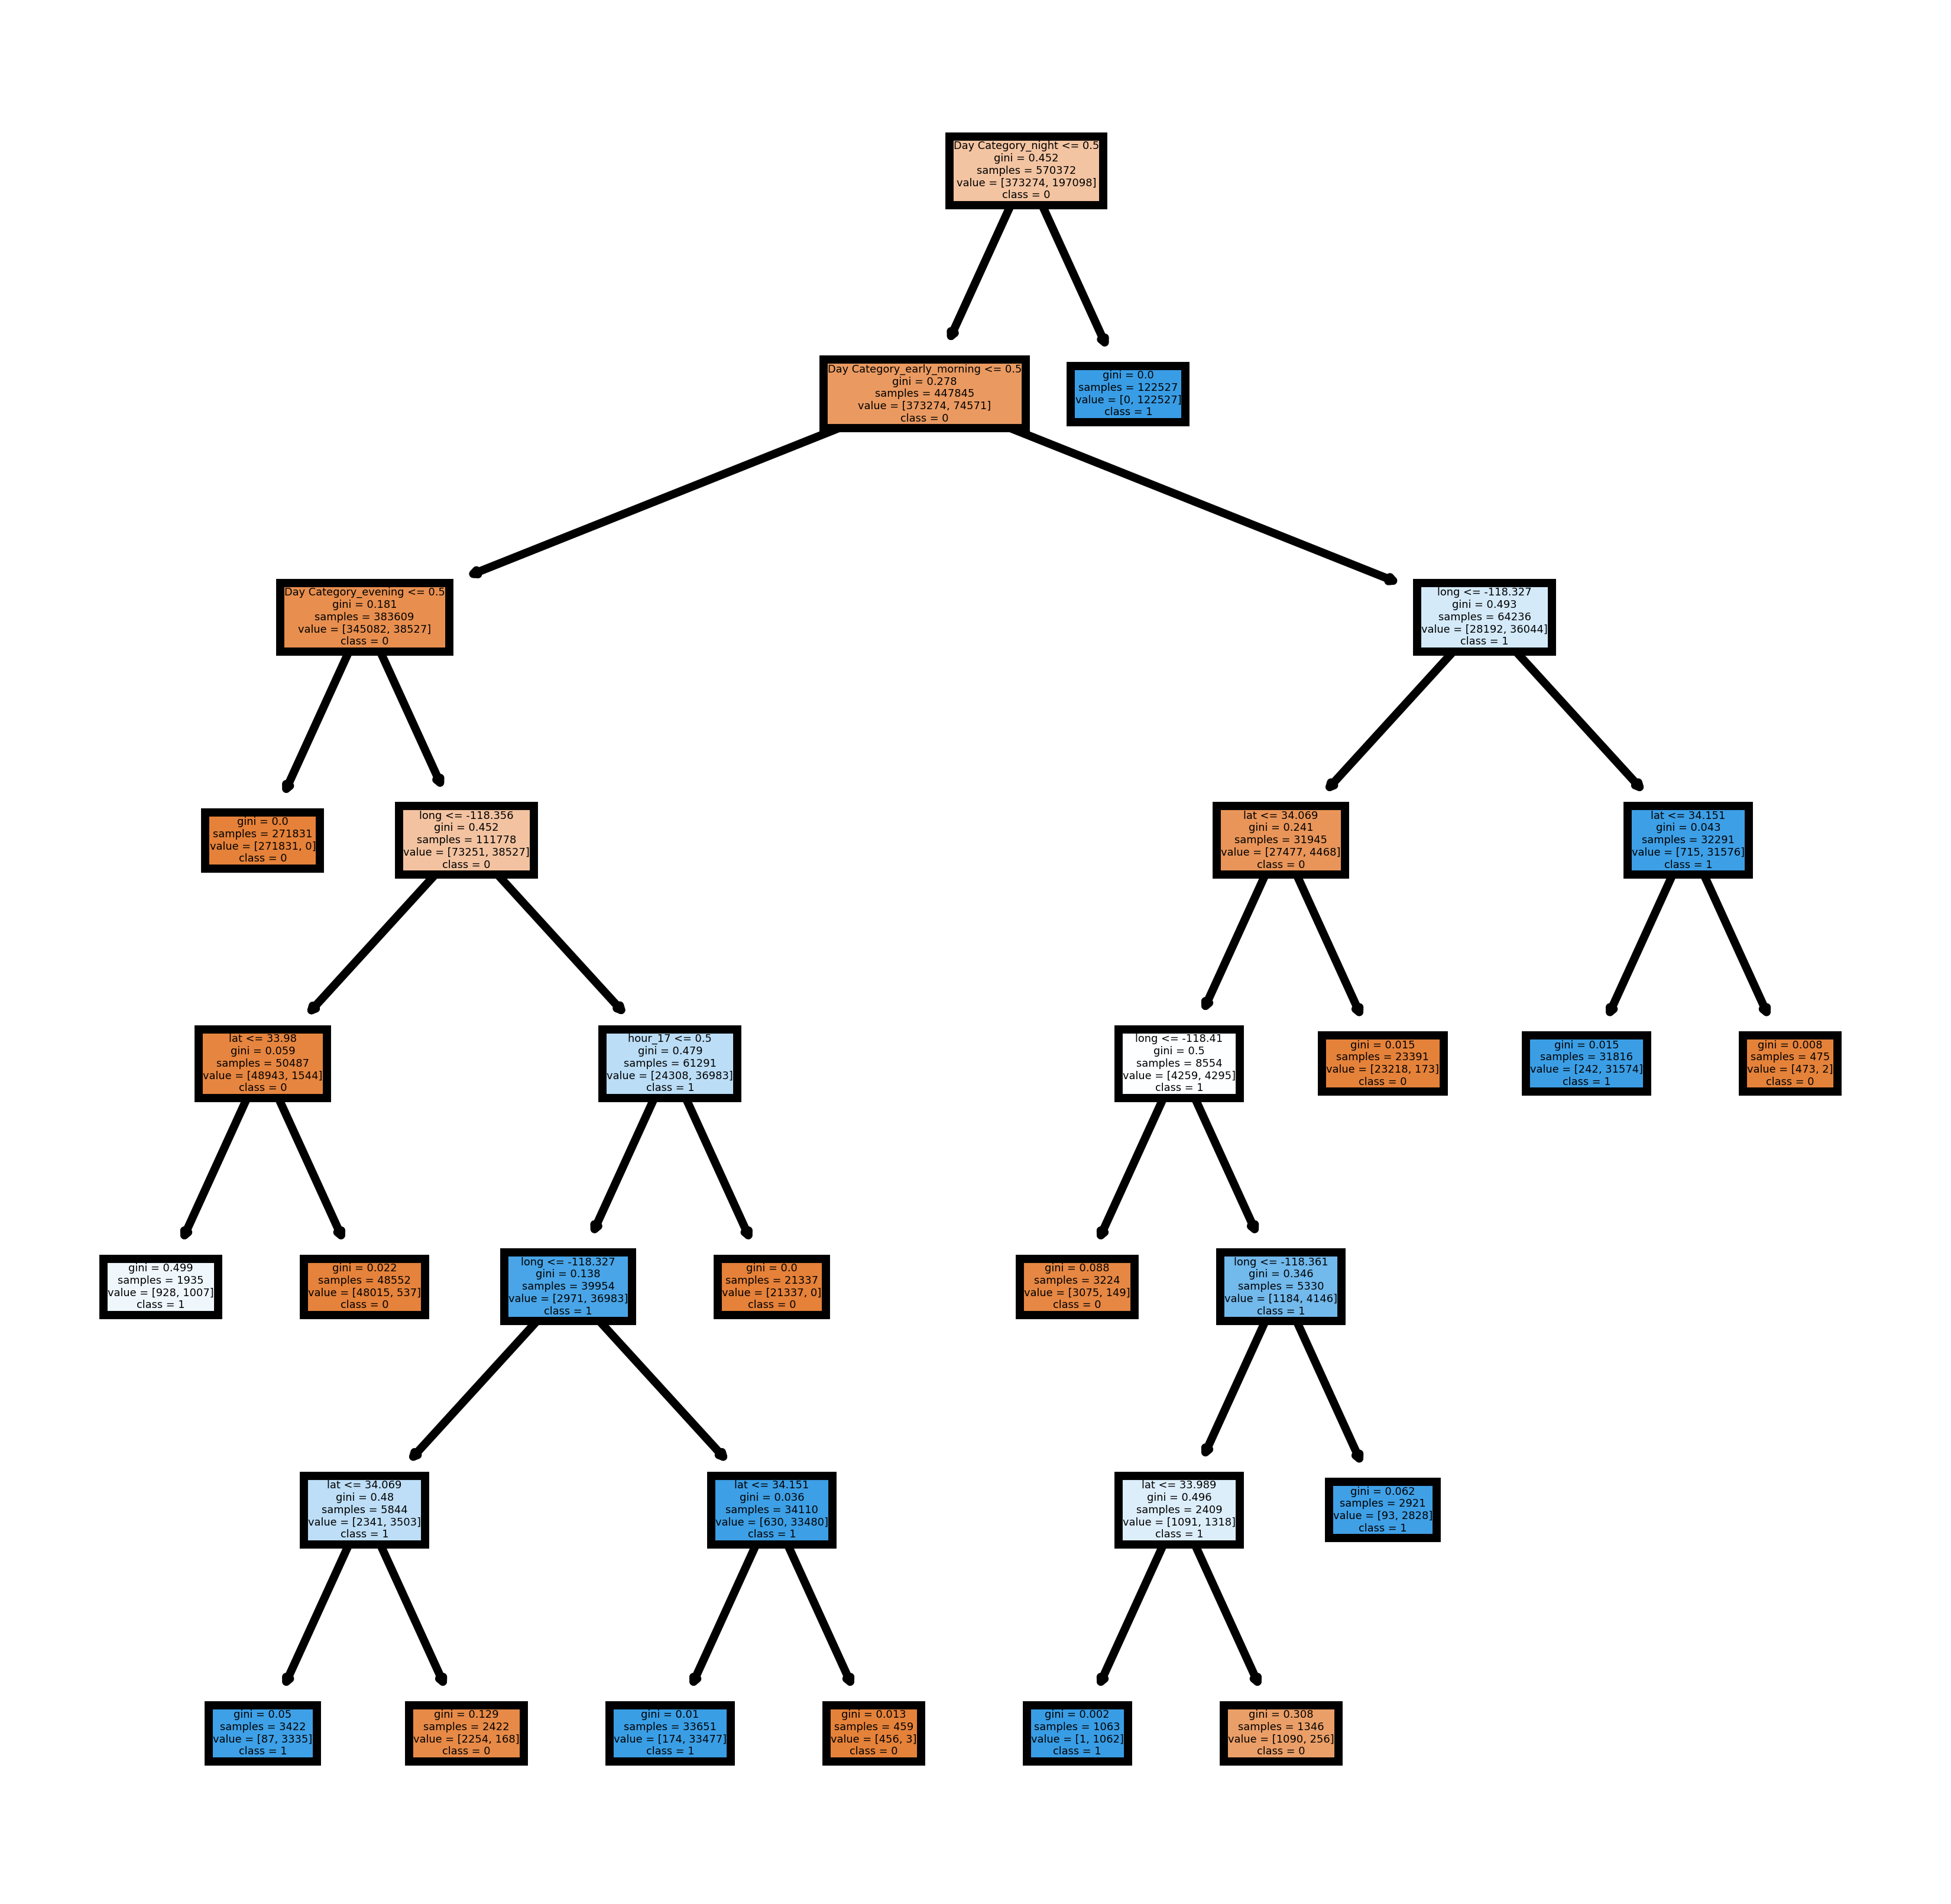

In [29]:
model_2 = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
model_2.fit(X, y_2)

plt.figure(figsize=(4,4), dpi=1000)
plot_tree(
    model_2, 
    feature_names=list(X.columns),
    class_names=[str(class_) for class_ in list(model_2.classes_)],
    filled=True
)

- feature_category <= 0.5 can be interpreted as 'feature != category'
- feature_category > 0.5 can be interpreted as 'feature = category'